In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('training_twitter_x_y_train.csv')
print(train_data.airline_sentiment.unique())
train_data.head()

['negative' 'positive' 'neutral']


,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [3]:
test_data = pd.read_csv('test_twitter_x_test.csv')
test_data.head()

,tweet_id,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569682010270101504,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada)
1,569608307184242688,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)
2,567879304593408001,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada)
3,569757651539660801,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada)
4,569900705852608513,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada)


In [4]:
x_train = train_data['text'].values
y_train = train_data['airline_sentiment'].values
x_train.shape[0]#, y_train.shape

10980

In [5]:
x_train[:5]

array(['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
       '@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
       '@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
       "@SouthwestAir @dultch97 that's horse radish 😤🐴",
       '@united so our flight into ORD was delayed because of Air Force One, but the last flight to SBN is at 8:20, 5 mins from now we just landed.'],
      dtype=object)

In [19]:
from re import sub
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

In [7]:
def get_simple_pos(tag):    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [23]:
x_train_final = []
for i in range(x_train.shape[0]):
    a = sub('[^a-zA-Z]', " ", x_train[i])
    a = a.strip()
    a = sub(' +', " ", a)
    a = a.split()
    lemmatizer = WordNetLemmatizer()
    a = [lemmatizer.lemmatize(word, pos = get_simple_pos(pos_tag([word])[0][1])).lower() for word in a if not word.lower() in set(stopwords.words('english'))]
    a = " ".join(a)
    x_train_final.append(a)
x_train_final[:5]


['southwestair schedule morning day fact yes sure even flight one cancelled flightled',
 'southwestair see worker time time go beyond love fly guy thank',
 'united flew ord miami back great crew service leg thanks',
 'southwestair dultch horse radish',
 'united flight ord delayed air force one last flight sbn min land']

In [24]:
from sklearn.preprocessing import LabelEncoder
label_y = LabelEncoder()
y_train = label_y.fit_transform(y_train)
y_train[:5]

array([0, 2, 2, 0, 0])

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [43]:
score = []
clf = LogisticRegression(multi_class='ovr', solver='newton-cg')
for i in range(1000, 2001, 100):
    tfidf = TfidfVectorizer(max_features= i)
    x = tfidf.fit_transform(x_train_final).toarray()
    score.append(cross_val_score(clf, x, y= y_train, cv= 3).mean())


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

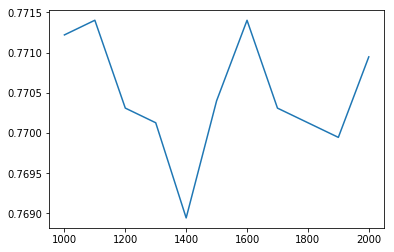

In [45]:
plt.plot(range(1000, 2001, 100), score)

In [47]:
tfidf = TfidfVectorizer(max_features= 1600)
x = tfidf.fit_transform(x_train_final).toarray()
clf.fit(x, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
x_test = test_data['text'].values

In [49]:
x_test_final = []
for i in range(x_test.shape[0]):
    a = sub('[^a-zA-Z]', " ", x_test[i])
    a = a.strip().lower()
    a = sub(' +', " ", a)
    a = a.split()
    lemmatizer = WordNetLemmatizer()
    a = [lemmatizer.lemmatize(word, pos = get_simple_pos(pos_tag([word])[0][1])).lower() for word in a if not word.lower() in set(stopwords.words('english'))]
    a = " ".join(a)
    x_test_final.append(a)

In [50]:
x_test_final = tfidf.transform(x_test_final)

In [51]:
ypred = clf.predict(x_test_final)